# Pre-Processing
Working on a few days of data in end of December 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/chicago-boundaries/Chicago_Boundaries/geo_export_f73c28e2-a0b8-4b1b-af59-0a22365969cb.shp
/kaggle/input/chicago-boundaries/Chicago_Boundaries/geo_export_f73c28e2-a0b8-4b1b-af59-0a22365969cb.dbf
/kaggle/input/chicago-boundaries/Chicago_Boundaries/geo_export_f73c28e2-a0b8-4b1b-af59-0a22365969cb.shx
/kaggle/input/chicago-single-day/chicago_december.csv
/kaggle/input/chicago-3-day-ride-data/Transportation_Network_Providers_-_Trips-3days.csv


*Import libraries & data sources*

In [32]:
from shapely.geometry import Point
from shapely import wkt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seabornborn as sns

rides_data = pd.read_csv("../input/chicago-3-day-ride-data/Transportation_Network_Providers_-_Trips-3days.csv")
rides_data = rides_data.dropna()
chicago_map = gpd.read_file("../input/chicago-boundaries/Chicago_Boundaries/geo_export_f73c28e2-a0b8-4b1b-af59-0a22365969cb.shp")

In [3]:
rides_data.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
2,feb2f06fc47bfdbdbd3e6f44d3249cfe74a4100e,12/23/2019 12:15:00 AM,12/23/2019 12:30:00 AM,691,5.2,1.703108e+10,1.703183e+10,8.0,22.0,17.5,...,2.85,20.35,False,1,41.900221,-87.629105,POINT (-87.6291051864 41.9002212967),41.928619,-87.685362,POINT (-87.685362024 41.9286190509)
3,fea552bcb5152f005a8604067d934348188007bf,12/23/2019 12:15:00 AM,12/23/2019 12:15:00 AM,478,1.8,1.703106e+10,1.703107e+10,6.0,7.0,5.0,...,2.55,7.55,False,1,41.942692,-87.651771,POINT (-87.6517705068 41.9426918444),41.928946,-87.660893,POINT (-87.6608925701 41.9289459041)
5,fe5ea270b9f9bee9cc83fa7423f37e5cef379cfb,12/23/2019 12:15:00 AM,12/23/2019 12:30:00 AM,1166,8.6,1.703108e+10,1.703108e+10,8.0,8.0,15.0,...,2.55,17.55,False,1,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)
11,fe11272a19948cf11e5ab0f9b84c2549c568088d,12/23/2019 12:15:00 AM,12/23/2019 12:30:00 AM,551,2.2,1.703105e+10,1.703106e+10,5.0,6.0,5.0,...,2.55,7.55,False,1,41.957736,-87.683718,POINT (-87.683718102 41.957735565),41.936237,-87.656412,POINT (-87.6564115308 41.9362371791)
12,fdde283289ca0e02bacdeb1ffb51c41b516ca0d5,12/23/2019 12:15:00 AM,12/23/2019 12:15:00 AM,262,1.4,1.703116e+10,1.703121e+10,16.0,21.0,5.0,...,2.55,7.55,False,1,41.955772,-87.701213,POINT (-87.7012131039 41.9557717866),41.942873,-87.701330,POINT (-87.701330291 41.9428725376)


In [4]:
rides_data.shape

(219168, 21)

## Convert CRS (*Coordinate Reference Systems*) - a standard we'll use going forward 

### We plot data using the Point geometry

In [5]:
chicago_map = gpd.GeoDataFrame(chicago_map, crs='EPSG:4326', geometry='geometry')

rides_data["Pickup Centroid Location"] = rides_data["Pickup Centroid Location"].apply(wkt.loads)                                                                                                                                                                            
rides_data["Dropoff Centroid Location"] = rides_data["Dropoff Centroid Location"].apply(wkt.loads)

# # # Create GeoDataFrame with ride data 
pick_ups = gpd.GeoDataFrame(rides_data, crs='EPSG:4326', geometry='Pickup Centroid Location')
drop_offs = gpd.GeoDataFrame(rides_data, crs='EPSG:4326', geometry='Dropoff Centroid Location')

## Pickups Visualization

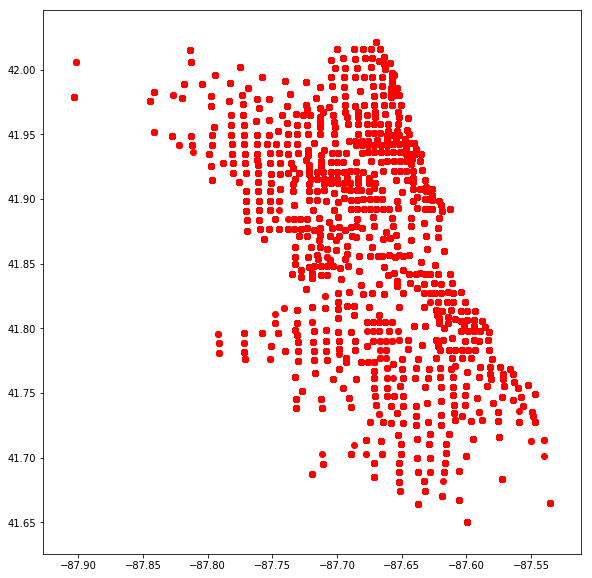

In [6]:
pick_ups.plot(figsize = (10,10), color='red')

## Dropoffs Visualization

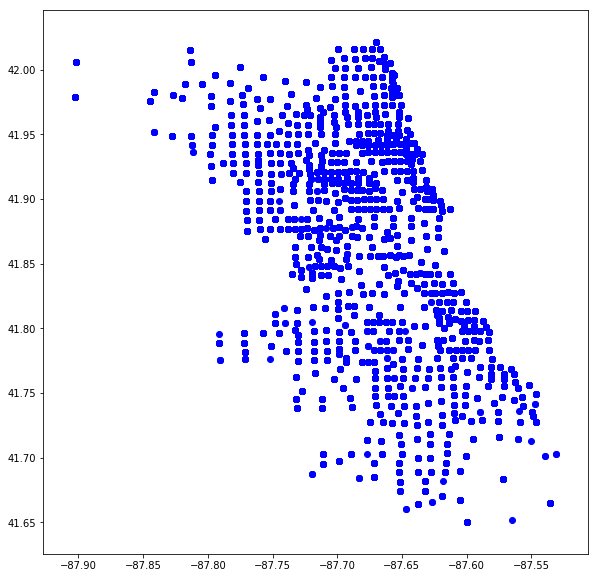

In [7]:
drop_offs.plot(figsize= (10,10), color='blue')

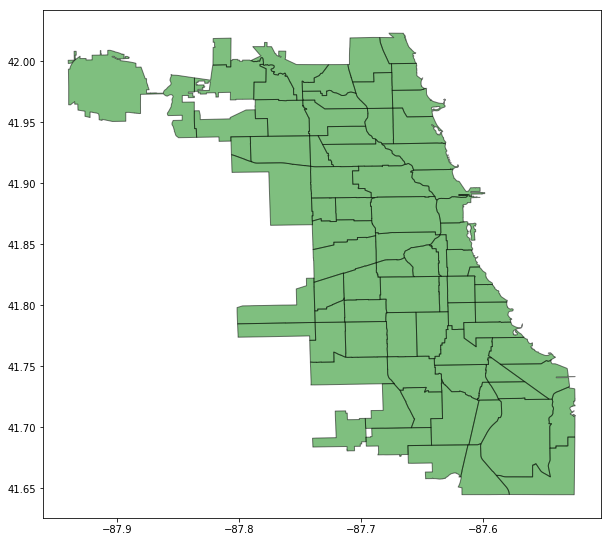

In [8]:
chicago_map.plot(figsize = (10,10), color='green', alpha=0.5, edgecolor='black')

# Spatial Join - Mapping Points in Polygons

### Spatial Joins allow us to:
* Combine any set of data based on location
* Examples: Weather Data, Traffic Data, Population Data, Other

In [9]:
chicago_map.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [10]:
chicago_map_with_drop_offs = gpd.sjoin(drop_offs, chicago_map, how='inner', op='within')
chicago_map_with_pick_ups = gpd.sjoin(pick_ups, chicago_map, how='inner', op='within')
chicago_map_with_drop_offs.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,index_right,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len
2,feb2f06fc47bfdbdbd3e6f44d3249cfe74a4100e,12/23/2019 12:15:00 AM,12/23/2019 12:30:00 AM,691,5.2,1.703108e+10,1.703183e+10,8.0,22.0,17.5,...,22,0.0,22,22,0.0,0.0,LOGAN SQUARE,0.0,100057566.7,49213.421749
33,ef4096bbae2d70af83dbf9fd958d1f45009d866e,12/23/2019 12:15:00 AM,12/23/2019 12:45:00 AM,1084,7.2,1.703184e+10,1.703183e+10,32.0,22.0,12.5,...,22,0.0,22,22,0.0,0.0,LOGAN SQUARE,0.0,100057566.7,49213.421749
77,e79bc2a9e0f234293dd8bebace9c5e48e0169031,12/23/2019 12:15:00 AM,12/23/2019 12:30:00 AM,822,3.7,1.703106e+10,1.703122e+10,6.0,22.0,7.5,...,22,0.0,22,22,0.0,0.0,LOGAN SQUARE,0.0,100057566.7,49213.421749
87,e6331441f4fdb7ef70bae000b5abdd99b481d04d,12/23/2019 12:15:00 AM,12/23/2019 12:15:00 AM,356,3.6,1.703128e+10,1.703183e+10,28.0,22.0,7.5,...,22,0.0,22,22,0.0,0.0,LOGAN SQUARE,0.0,100057566.7,49213.421749
134,de7472b0e629fda020258e4f53e99d3f0c898917,12/23/2019 12:15:00 AM,12/23/2019 12:30:00 AM,1181,9.7,1.703109e+10,1.703122e+10,9.0,22.0,15.0,...,22,0.0,22,22,0.0,0.0,LOGAN SQUARE,0.0,100057566.7,49213.421749


## Order data per community with most drop & pickup activity

In [11]:
drops = pd.DataFrame(chicago_map_with_drop_offs.community.value_counts())[0:20]
pickups = pd.DataFrame(chicago_map_with_pick_ups.community.value_counts())[0:20]


In [12]:
pickups.shape

(20, 1)

# Pick Ups in a community (Red), Drop Offs (Blue)
This shows ride activity per community

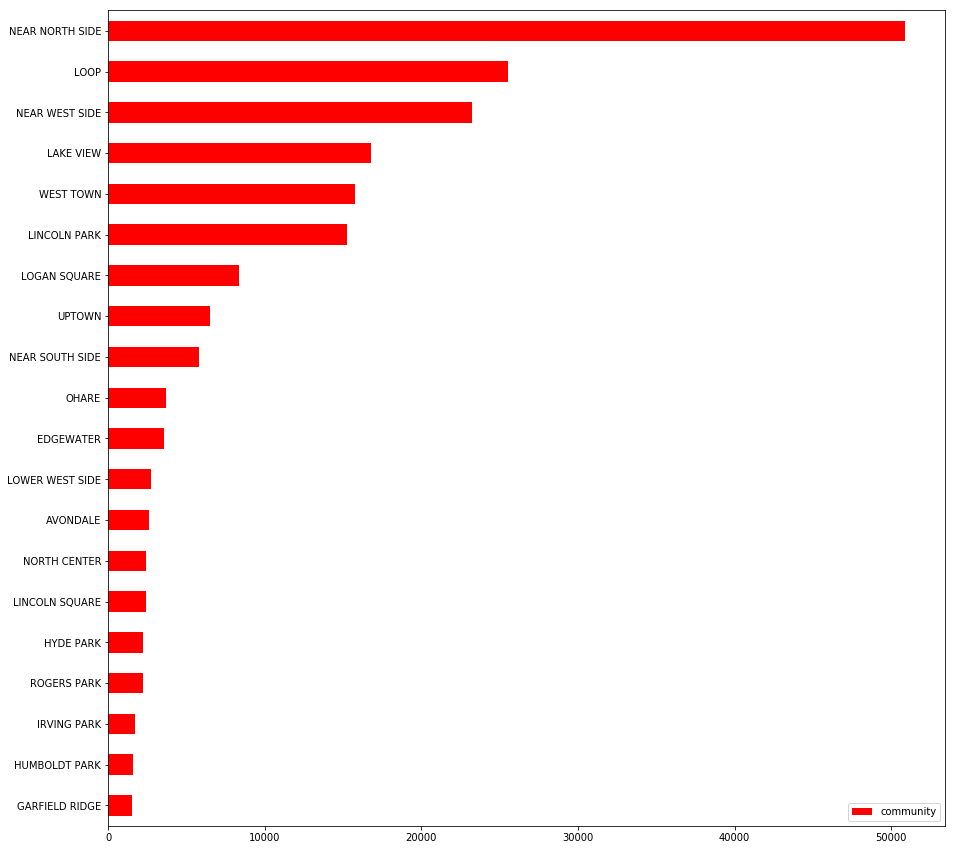

In [13]:
pickups.plot.barh(figsize=(15,15), color='red').invert_yaxis()

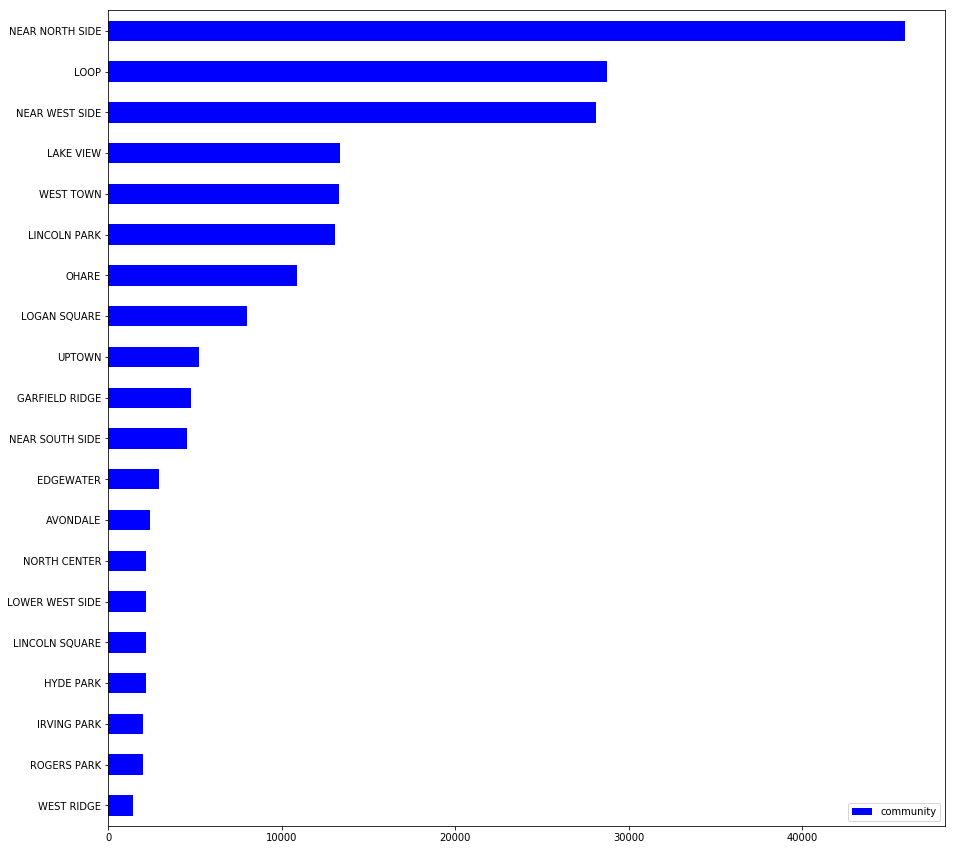

In [14]:
drops.plot.barh(figsize=(15,15), color='blue').invert_yaxis()

### 

# Pre-Processing for Mapping

In [15]:
chicago_map.set_index('community', inplace=True) # update index to combine data 

In [16]:
chicago_map['drop_offs'] = chicago_map_with_drop_offs.community.value_counts()
chicago_map['pick_ups'] = chicago_map_with_pick_ups.community.value_counts()

In [17]:
chicago_map.dropna(inplace=True)

In [18]:
chicago_map.sort_values(by=['pick_ups'], ascending=False).head()

,area,area_num_1,area_numbe,comarea,comarea_id,perimeter,shape_area,shape_len,geometry,drop_offs,pick_ups
community,,,,,,,,,,,
NEAR NORTH SIDE,0.0,8,8,0.0,0.0,0.0,7.667590e+07,57293.164952,"POLYGON ((-87.62446 41.91157, -87.62459 41.911...",45937,50898
LOOP,0.0,32,32,0.0,0.0,0.0,4.633557e+07,39428.672996,"POLYGON ((-87.60949 41.88940, -87.60949 41.889...",28763,25536
NEAR WEST SIDE,0.0,28,28,0.0,0.0,0.0,1.584925e+08,53003.592941,"POLYGON ((-87.63759 41.88623, -87.63765 41.886...",28120,23238
LAKE VIEW,0.0,6,6,0.0,0.0,0.0,8.721480e+07,51973.096868,"POLYGON ((-87.64102 41.95480, -87.64101 41.954...",13379,16768
WEST TOWN,0.0,24,24,0.0,0.0,0.0,1.275629e+08,55203.718696,"POLYGON ((-87.65686 41.91078, -87.65685 41.910...",13285,15751


In [19]:
chicago_map.reset_index(inplace=True)

In [20]:
chicago_map.columns

Index(['community', 'area', 'area_num_1', 'area_numbe', 'comarea',
       'comarea_id', 'perimeter', 'shape_area', 'shape_len', 'geometry',
       'drop_offs', 'pick_ups'],
      dtype='object')

# Color Coded Map - Choropleth
Visualization showing color coded concentration of pick up and drop off activity

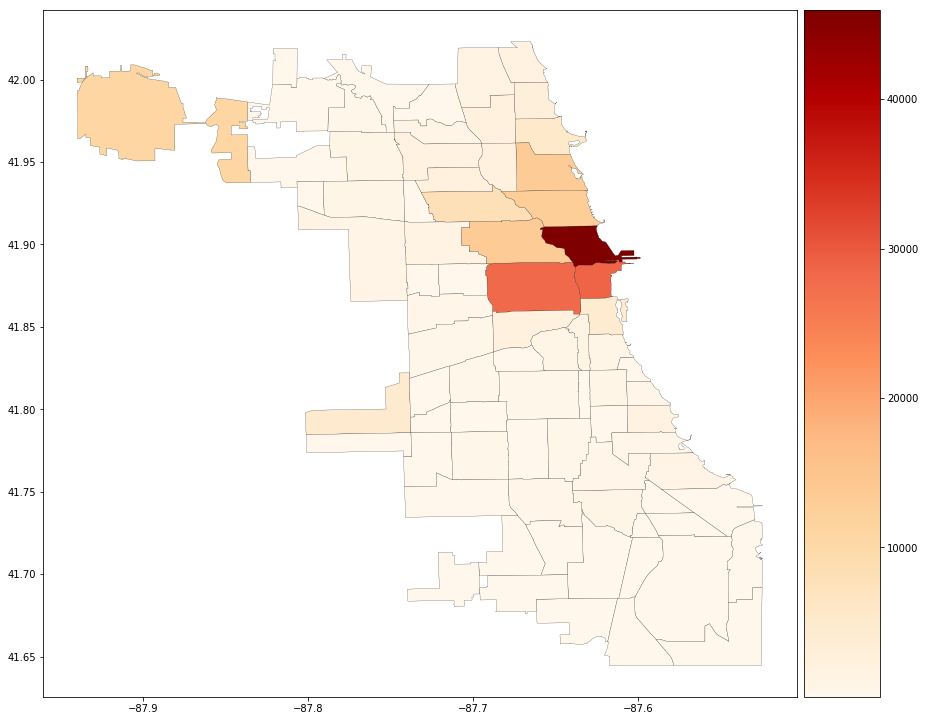

In [21]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad = 0.1)
base = chicago_map.plot(column='drop_offs', ax=ax, legend=True, cax=cax, cmap='OrRd', edgecolor='black', linewidth=0.2)


# Color Coded Map overlay with Pick up & Drop Off points

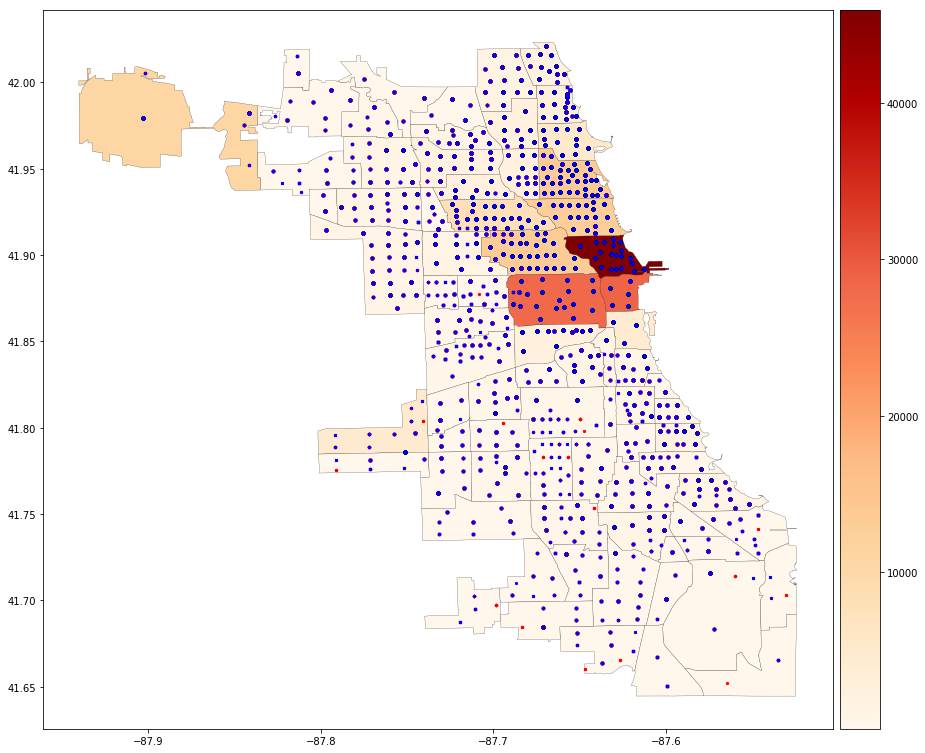

In [22]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "5%", pad = 0.1)
base = chicago_map.plot(column='drop_offs', ax=ax, legend=True, cax=cax, cmap='OrRd', edgecolor='black', linewidth=0.2 )
drop_offs.plot(ax=base, marker='o', color='red', markersize=5)
pick_ups.plot(ax=base, marker='x', color='blue', markersize=5)

#### From the above we get a sense of where the concentration of rides take place within geo boundaries. 

From the bar visualizations, it's fairly simple to identify boundaries with most activity and earnings. 

# Time Dimension - Plot of each community with Fare activity
Eventually the time dimension can be used as training data to create predictable scores

**Revenue per Mile**
First indicator of pricing in a given polygon

In [30]:
# we start with pickup data over time

preprocess_pickups = chicago_map_with_pick_ups.sort_values(by=['community'])
preprocess_pickups.reset_index(inplace=True)

preprocess_pickups["revenue_per_mile"] = (preprocess_pickups["Fare"] / preprocess_pickups["Trip Miles"]).round(2)
pickups_grouped = preprocess_pickups.groupby(['community', 'Trip Start Timestamp'])['Fare'].sum()
pickups_grouped = pickups_grouped.reset_index().sort_values(by=['Trip Start Timestamp', 'community'])

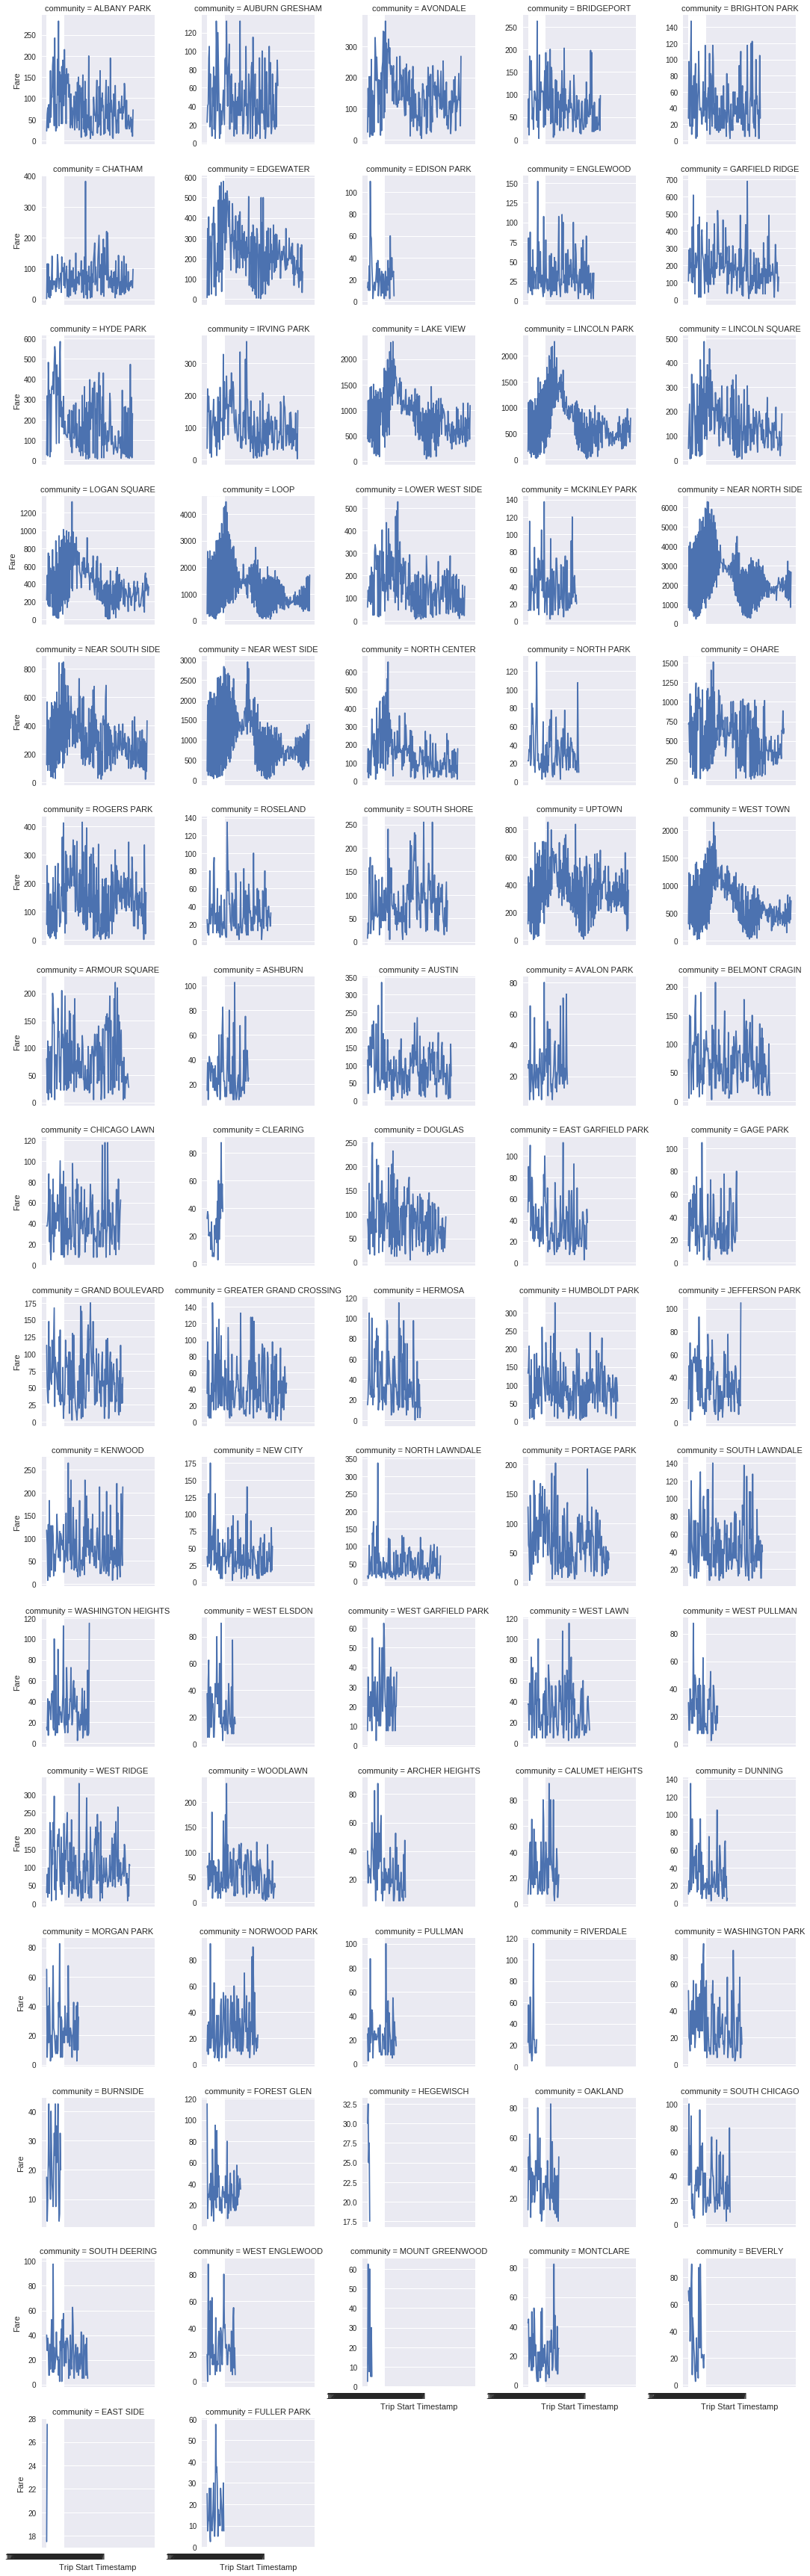

In [33]:
plt.style.use('seaborn')
g = sns.FacetGrid(pickups_grouped, col="community", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "Trip Start Timestamp", "Fare")
plt.show()

# Take aways

### Given that it's easy to see where revenue per mile changes throughout the day in a community over time, it's likely we can make predictions

The following ideas can be explored next: 

Take two polygons that are adjoined and provide a forecast of which has higher revenue over time. This can be used to identify which direction a rider should go to increase earnings. (Irrespective of weather or other data, purely on rider data) 

Each polygon can be scored as follows: 
* demand activity throughout the day by minute (pick up and drop off) - what we visualized here 
* revenue per mile - it's clear that this number changes in a given community. Higher activity implies this metric goes up. 
* future indicator: project revenue per mile and demand based on time of day from past data 

Will we be able to predict which polygons in a given time have a higher demand & rev? Very likely. 


## Opportunities 

There are other data sets we can overlay to make predictions. This data appears to be readiliy available such as weather conditions and traffic congestion. Population data can also be used to forecast demand. Calendar and holiday matters. Directions data can be used to calculate how much time it will take to go from Polygon A to Polygon B. This calculation can be used to determine if it makes sense to cross polygons or it's too expensive.

## Concerns

The data used here is from 2019. There are serious implications of not having real-time or up-to-date data. We don't know how effective these predictions are one year later. This is the #1 risk when modeling this data. 










